# Assignment 4

In [2]:
# Import libraries necessary for the tasks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Task 1 (1 point)

#### Drawing Lines

Draw one continuous red line from the point [-1, 3] to the point [4, -1]. Mark these points with a $\Diamond$ (diamond marker). 

Then draw one dashed blue line, twice as thick as the previous one, from the point [-2, -2] to the point [3, 5]. Mark these points with an ``x``. 

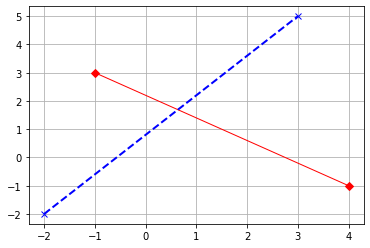

In [18]:
plt.figure()
plt.plot([-1, 4], [3, -1], '-rD', lw = 1)
plt.plot([-2, 3], [-2, 5], '--bx', lw = 2)
plt.grid()
plt.show()

## Task 2 (1 point)

#### Plotting Pandas Dataset

Draw the data set *dino* from the tab-separated file ``DatasaurusDozen.tsv`` (see material for lecture *Visualization*). Please remove the axis ticks.

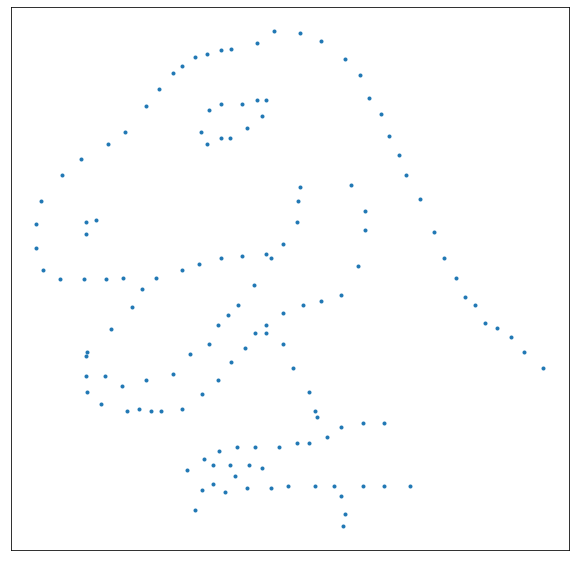

In [20]:
ds = pd.read_csv('data/DatasaurusDozen.tsv',sep='\t')
plt.figure(figsize=[10,10])
plt.plot(ds.loc[ds['dataset']=='dino','x'],
         ds.loc[ds['dataset']=='dino','y'],'.');
plt.xticks([])
plt.yticks([])
plt.show()

## Task 3 (1 point)

**2D Kernel Density Estimates**

Create a 2D normally distributed variable with mean $\mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ and covariance matrix $\Sigma = \begin{bmatrix} 5 & 2 \\ 2 & 2 \end{bmatrix}$. Plot the joint kernel density estimate.

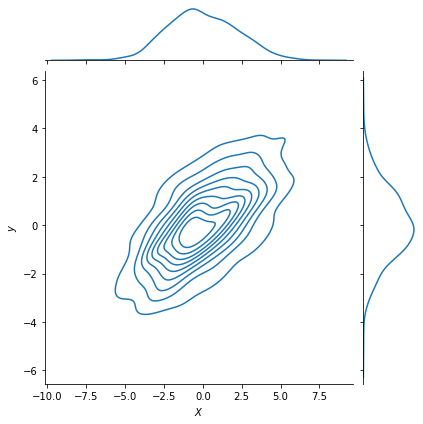

In [10]:
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(5, 2), (2, 2)]
x, y = rs.multivariate_normal(mean, cov, 1000).T
x = pd.Series(x, name="$X$")
y = pd.Series(y, name="$y$")
g = sns.jointplot(x=x, y=y, kind="kde")

## Task 4 (2 points)

**You're not a Data Scientist if you don't know the Iris dataset :^)**

One of the best known datasets in Data Science is the **Iris dataset**: https://archive.ics.uci.edu/ml/datasets/iris

1) Load it with the library *seaborn* and draw **boxplots** for each of its four attributes: **petal/sepal length/width**. There should only be one output window (of 2x2 plots, for instance). For this, use the ``subplot`` function from ``matplotlib``.

2) Draw the **pairplots** of the attributes. The diagonal plots should be (discrete) histograms, not (continuous) kernel density estimates. Also, make sure to color-code each species in all the plots.

In [14]:
# Load Iris dataset and inspect its head
ds = sns.load_dataset('iris')
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


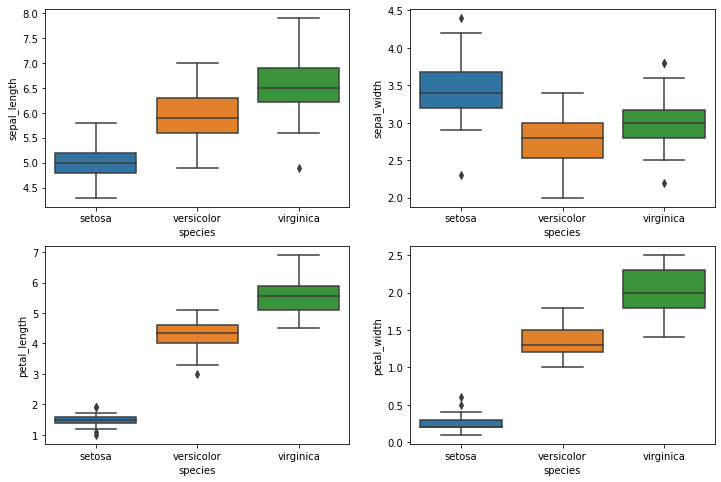

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x='species', y='sepal_length', data=ds)

plt.subplot(222)
sns.boxplot(x='species', y='sepal_width', data=ds)

plt.subplot(223)
sns.boxplot(x='species', y='petal_length', data=ds)

plt.subplot(224)
sns.boxplot(x='species', y='petal_width', data=ds)
plt.show()

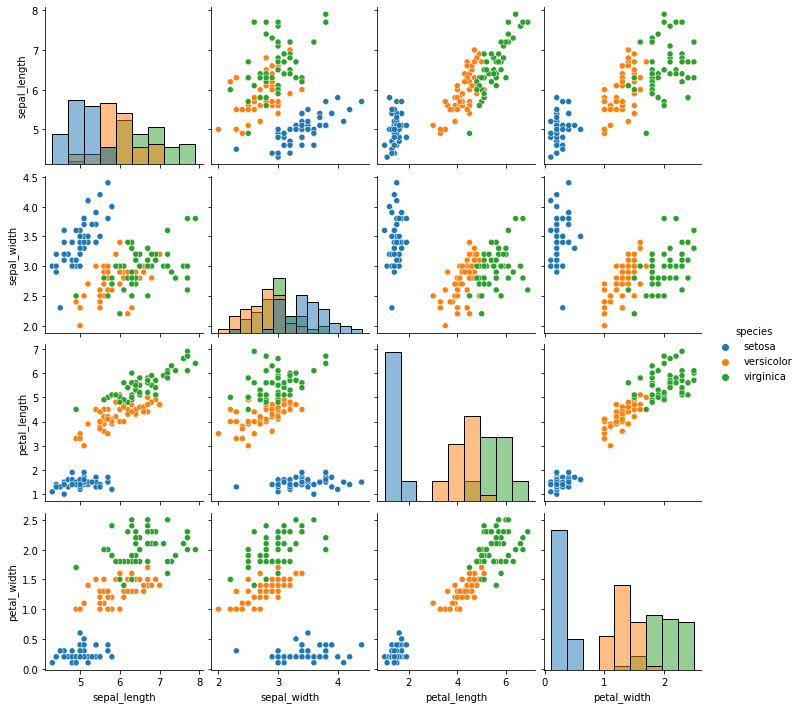

In [25]:
sns.pairplot(ds, hue='species', diag_kind="hist")

## Task 5 (5 points):

In this exercise you will implement a simple perceptron for handwritten digit recognition. What you need is to implement the pseudocode for the perceptron learning algorithm given in the lecture.

Test your function for at least one digit in the code cell at the end of this notebook. The learning curve should converge towards a high accuracy score (above 0.9).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

def perceptron_train(X, Y, iterations=100, eta=.1):
    '''
    Trains a perceptron and returns the weights and learning curve as a vector of accuracies.
    
    Input:
    - X: Pixel matrix to encode the digits (every row is a gray-valued pixel vector for a number)
    - Y: Vector of true labels i.e. Y[0] is the label for the first digit in the dataset
    - iterations: Maximum number of allowed iterations. Defaults to 100.
    - eta: Learning rate for SGD. Defaults to 0.1.
    
    Output:
    - weights: The parameters of the linear decision boundary.
    - acc: Vector of accuracies for every iteration step.
    '''
    
    acc = np.zeros(iterations)
    
    # Initialize weight vector
    weights = np.random.randn(X.shape[1]) * 1e-5
    
    for it in np.arange(iterations):
        
        # Indices of misclassified data
        wrong = (np.sign(X @ weights) != Y).nonzero()[0]
        
        if wrong.shape[0] > 0:
            # Pick a random misclassified data point
            rand_ex = np.random.randint(0,wrong.shape[0])
            
            # Update weight vector
            weights += (eta/(1.+it)) * X[wrong[rand_ex],:] * Y[wrong[rand_ex]] 
            
            # Compute accuracy
            acc[it] = np.double(np.sum(np.sign(X @ weights) == Y)) / X.shape[0]
            
    # Return weight vector and accuracy
    return weights, acc

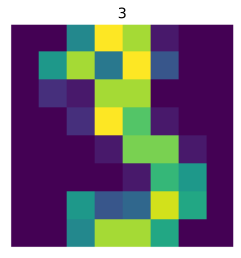

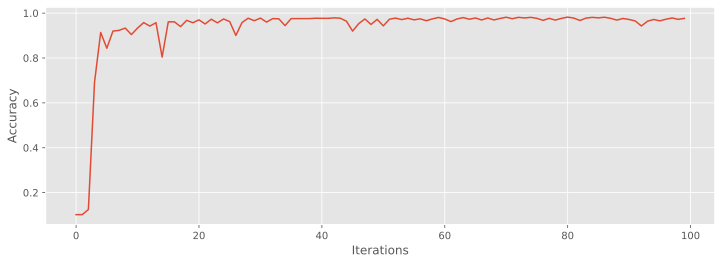

In [2]:
from sklearn.datasets import load_digits

digit_to_recognize = 3 # You can pick any other one from 0 to 9

# Load the usps digits dataset from sklearn repository
X, Y = load_digits(n_class=10, return_X_y=True)

# Plot one example of the chosen digit
for i in range(len(X)):
    if Y[i] == digit_to_recognize:
        plt.matshow(X[i,:].reshape(8,8))
        plt.xticks([])
        plt.yticks([])
        plt.title(Y[i])
        plt.savefig("usps_example.png")
        break

# Transform the 10-class labels into binary form
y = np.sign((Y == digit_to_recognize)* 1.0 - .5)
_, acc = perceptron_train(X, y)
plt.figure(figsize=[12,4])
plt.plot(acc)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("learning_curve.png")